# Interacting with Claude 3-Sonnet with images

## Context

Claude 3 now includes the ability to pass an image along with text to the model. This allows you to ask questions about an image opening up a another dimension of interactivity. With Claude 3, the new Messages API body format is required. The following is an example of a multimodal in the Messages API format.

Please see [Claude Vision](https://docs.anthropic.com/claude/docs/vision) for more details on Claude 3 multimodal capabilties and [Amazon Bedrock Claude Messages API](https://docs.aws.amazon.com/bedrock/latest/userguide/model-parameters-anthropic-claude-messages.html) for working with the new Messages API on Bedrock


In [ ]:
{
  "modelId": "anthropic.claude-3-sonnet-20240229-v1:0",
  "contentType": "application/json",
  "accept": "application/json",
  "body": {
    "anthropic_version": "bedrock-2023-05-31",
    "max_tokens": 1000,
    "messages": {
      "role": "user",
      "content": [
        {
          "type": "image",
          "source": {
            "type": "base64",
            "media_type": "image/jpeg",
            "data": "iVBORw..."
          }
        },
        {
          "type": "text",
          "text": "What's in this image?"
        }
      ]
    }
  }
}

## Notebook Walkthrough

In this notebook, we will provide an image __"animal.jpg"__ to the Claude 3-Sonnet model with model identifier __"anthropic.claude-3-sonnet-20240229-v1:0"__ together with a text query asking about what is in the image. To do this, we will package the image and text into the __MessagesAPI__ format and utilize the __invoke_model__ function from __bedrock-runtime__ within our helper function defined below to generate a response from Claude 3.

## Setup

### Here we install some of the required libraries needed in this notebook.

In [ ]:
%pip install --upgrade pip
%pip install boto3>=1.33.2 --force-reinstall --quiet
%pip install botocore>=1.33.2 --force-reinstall --quiet


### Restart the kernel with the updated packages that are installed through the dependencies above

In [ ]:
# restart kernel
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

### Follow the steps below to set up necessary packages
1. Import the necessary libraries for creating the __bedrock-runtime__ needed to invoke foundation models, formatting our JSON bodies, and converting our images into base64 encoding

In [12]:
import boto3
import json
import base64

bedrock_client = boto3.client('bedrock-runtime',region_name='us-west-2')


### Define helper function to pass our models, messages, and inference parameters

In [13]:
def generate_message(bedrock_runtime, model_id, messages, max_tokens,top_p,temp):

    body=json.dumps(
        {
            "anthropic_version": "bedrock-2023-05-31",
            "max_tokens": max_tokens,
            "messages": messages,
            "temperature": temp,
            "top_p": top_p
        }  
    )  
    
    response = bedrock_runtime.invoke_model(body=body, modelId=model_id)
    response_body = json.loads(response.get('body').read())

    return response_body

## Example use case: Identification of objects in an image

The following image __"animal.jpg"__ will be used in the demo

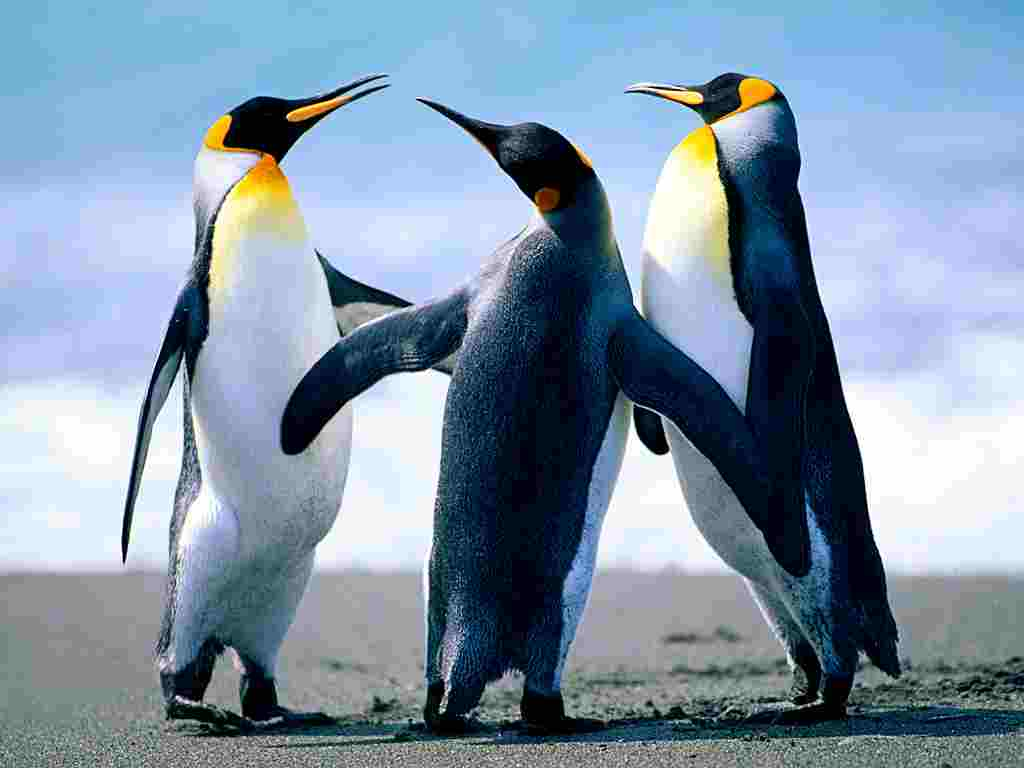

### Process the jpeg image

Here we process the jpeg image into b64 encoding. The result will be used as the image component of the message given to Claude 3. For further details on processing of the images for use in an API call please see [Claude Vision](https://docs.anthropic.com/claude/docs/vision)

In [14]:
# Read reference image from file and encode as base64 strings.
with open('animal.jpg', "rb") as image_file:
    content_image = base64.b64encode(image_file.read()).decode('utf8')

### Create message payload that incorporates text and image input

Here we create the multimodal content message for our input to Claude 3 with seperate JSON objects for the text component and the image component.

In [21]:
message_mm=[

    { "role": "user",
      "content": [
      {"type": "image","source": { "type": "base64","media_type":"image/jpeg","data": content_image}},
      {"type": "text","text": "What is in this image?"}
      ]
    }
]


### Generate the response from Claude 3

Finally, we can see the multimodal capabilities in action, asking Claude 3 about what is in the image. The model identifier we are using for this example is __"anthropic.claude-3-sonnet-20240229-v1:0"__.

In [ ]:
generate_message(bedrock_client, model_id = "anthropic.claude-3-sonnet-20240229-v1:0",messages=message_mm,max_tokens=512,temp=0.5,top_p=0.9)

## Next Steps

Now that we have seen how to incoporate multimodal capabilties of Claude 3-Sonnet on Amazon Bedrock, try asking a different question about the image like "How many animals are shown in the image", or "What kind of location was this image taken at?" In addition to asking different questions, you can trying inputting other images and experimenting with the results.